## Mobile Price Range Classification  
<br>
This is a dataset from kaggle which aims to find out the price range of different mobile phones. The ranges are in categorical form, thus we choose random forest classification to deal with this problem. 

### Data Exploration
<br>
Before we fit the data with the algorithm, we would like to see if there is any interesting relationship among the data. This dataset is already cleaned thus data cleansing is not neccesary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import our dataset.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Have a look on some basics information and statistics of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Find out the attribute pairs with strong correlation.

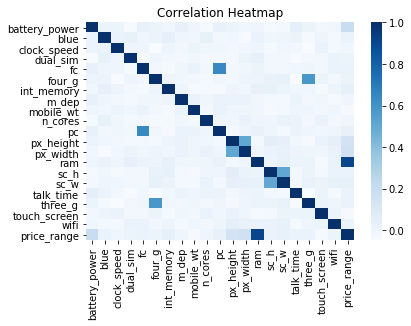

In [6]:
sns.heatmap(df.corr(), cmap='Blues').set_title('Correlation Heatmap')
plt.show()

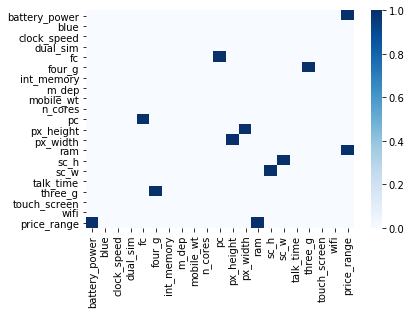

In [7]:
c = df.corr().apply(abs)
sns.heatmap((c>0.2)&(c!=1),cmap='Blues')

So now we can identify some attribute pairs with significant correlation. They are:<br/>
pc - fc<br/>
three_g - four_g<br/>
px_width - px_height<br/>
sc_h - sc_w<br/>
Other than that, we can also notice that price_range is significantly correlated to both battery_power and ram.<br><br>
We would also want to see the scatter plots between different numerical variables.

In [8]:
binary_col = []
for col in df.columns:
    if df[col].nunique()==2:
        binary_col.append(col)
binary_col

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [9]:
num = df.drop(binary_col,axis=1)
num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


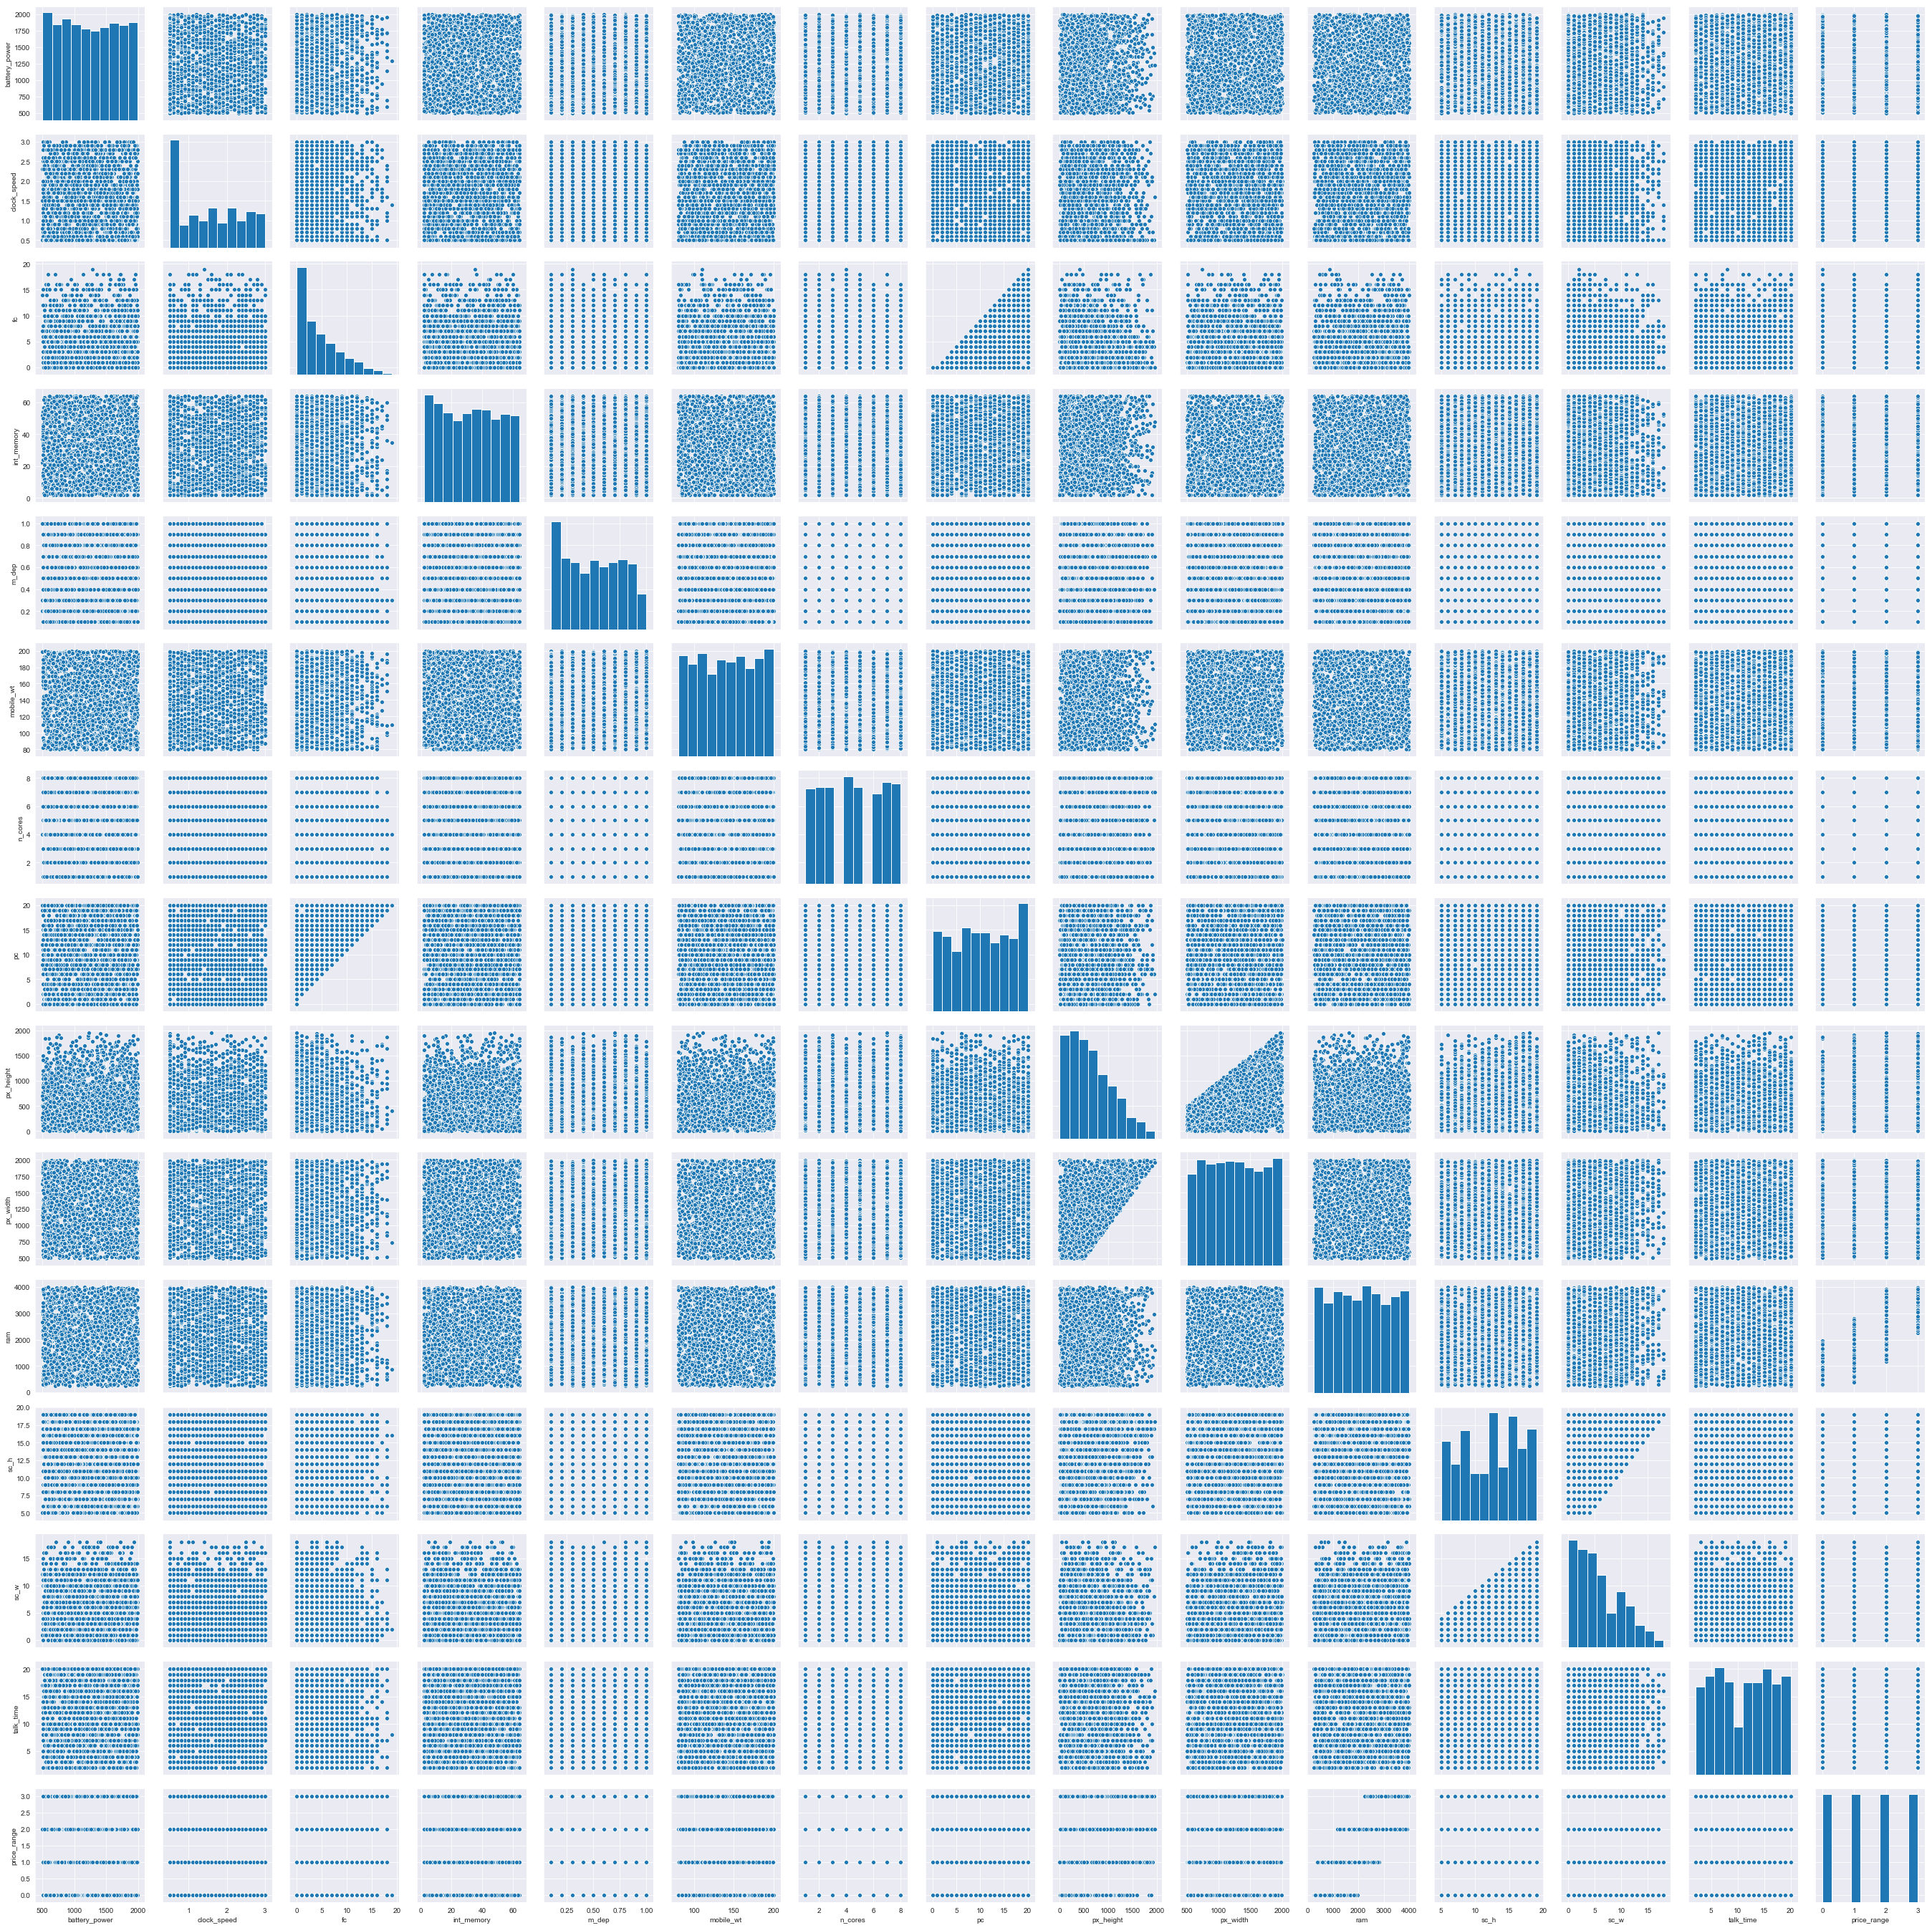

In [152]:
pairplot = sns.pairplot(num)

As expected, no significant patterns can be seen, thus we can move on with our machine learning model and let the algorithm do the work.

### Random Forest Classifier
<br>
In th second half of this notebook, we are going to go through a straightforward procedures to train a Random Forest Classifier and slightly tune the number of tree to improve it's accuracy.

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Split the data into 70% of test set and 30% of training set.

In [158]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Fit a random forest model with 10 trees. 

In [163]:
model = RandomForestClassifier(n_estimators=10, random_state=100)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [169]:
print(classification_report(y_test, pred),'\n')
print('Confusion matrix:\n',confusion_matrix(y_test, pred))
print('\nAccuracy:',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       159
           1       0.68      0.71      0.70       146
           2       0.75      0.68      0.71       147
           3       0.88      0.90      0.89       148

   micro avg       0.79      0.79      0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600
 

Confusion matrix:
 [[138  21   0   0]
 [ 24 104  18   0]
 [  0  28 100  19]
 [  0   0  15 133]]

Accuracy: 0.7916666666666666


Now we can try to adjust the number of tree and see how the accuracy change. To reduce the effect of randomness of accuracy, each classifiers of different number of trees will be fitted 20 times with different random seeds and calculate the mean accuracy.

In [174]:
acc = []
acplot = pd.DataFrame({'Number of Trees':ind})
ind = list(map(int,np.linspace(10,200,20)))
np.random.seed(100)
rand = np.random.randint(0,10000,20)
for j in np.arange(1,21):
    for i in np.arange(0,20):
        model = RandomForestClassifier(n_estimators=ind[i],random_state=rand[j-1])
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,pred))
    acplot['Accuracy_'+str(j)]=acc
    acc=[]

In [175]:
def acc_mean(x):
    ans = 0
    for i in np.arange(1,21):
        ans += x['Accuracy_'+str(i)]
    ans= ans/20
    return ans
acplot['Accuracy_mean'] = acplot.apply(acc_mean,axis=1)
acplot.head(10)

,Number of Trees,Accuracy_1,Accuracy_2,Accuracy_3,Accuracy_4,Accuracy_5,Accuracy_6,Accuracy_7,Accuracy_8,Accuracy_9,...,Accuracy_12,Accuracy_13,Accuracy_14,Accuracy_15,Accuracy_16,Accuracy_17,Accuracy_18,Accuracy_19,Accuracy_20,Accuracy_mean
0,10,0.821667,0.770000,0.765000,0.801667,0.781667,0.800000,0.761667,0.796667,0.811667,...,0.788333,0.806667,0.813333,0.813333,0.760000,0.786667,0.796667,0.785000,0.803333,0.793167
1,20,0.830000,0.840000,0.823333,0.806667,0.818333,0.825000,0.810000,0.836667,0.823333,...,0.831667,0.855000,0.850000,0.836667,0.836667,0.828333,0.853333,0.838333,0.846667,0.832750
2,30,0.843333,0.863333,0.845000,0.843333,0.848333,0.826667,0.846667,0.841667,0.848333,...,0.833333,0.873333,0.856667,0.846667,0.853333,0.825000,0.861667,0.843333,0.855000,0.847333
3,40,0.845000,0.861667,0.863333,0.861667,0.860000,0.856667,0.841667,0.848333,0.876667,...,0.835000,0.871667,0.868333,0.860000,0.846667,0.836667,0.883333,0.861667,0.861667,0.858167
4,50,0.851667,0.868333,0.865000,0.871667,0.871667,0.868333,0.846667,0.860000,0.878333,...,0.846667,0.870000,0.875000,0.876667,0.855000,0.833333,0.871667,0.865000,0.856667,0.863250
5,60,0.850000,0.873333,0.865000,0.876667,0.875000,0.875000,0.846667,0.868333,0.878333,...,0.850000,0.875000,0.868333,0.880000,0.853333,0.848333,0.878333,0.868333,0.866667,0.866583
6,70,0.856667,0.876667,0.875000,0.870000,0.871667,0.876667,0.858333,0.865000,0.881667,...,0.855000,0.878333,0.873333,0.875000,0.851667,0.853333,0.875000,0.871667,0.865000,0.868250
7,80,0.855000,0.876667,0.880000,0.873333,0.868333,0.876667,0.863333,0.865000,0.876667,...,0.855000,0.876667,0.873333,0.871667,0.850000,0.861667,0.871667,0.861667,0.866667,0.868333
8,90,0.861667,0.878333,0.880000,0.871667,0.873333,0.878333,0.868333,0.860000,0.881667,...,0.853333,0.876667,0.878333,0.873333,0.861667,0.866667,0.873333,0.868333,0.873333,0.871083
9,100,0.860000,0.878333,0.883333,0.871667,0.875000,0.880000,0.861667,0.868333,0.885000,...,0.851667,0.875000,0.880000,0.876667,0.871667,0.865000,0.870000,0.876667,0.880000,0.873167


Plot the accuracies agains number of trees.

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

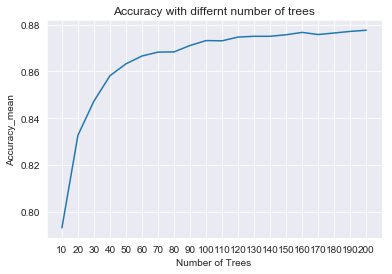

In [178]:
plot = sns.lineplot('Number of Trees','Accuracy_mean',data = acplot)
plot.set_xticks(acplot['Number of Trees'])
plot.set_title('Accuracy with differnt number of trees')
plt.show()

Increment will be much less significant after 100 trees, thus we can choose to retrain a model with 120 trees which should be good enough and requires limited computational power.

In [179]:
model = RandomForestClassifier(n_estimators=120, random_state=100)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred),'\n')
print('Confusion matrix:\n',confusion_matrix(y_test, pred))
print('\nAccuracy:',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       159
           1       0.80      0.82      0.81       146
           2       0.86      0.79      0.82       147
           3       0.94      0.97      0.95       148

   micro avg       0.88      0.88      0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600
 

Confusion matrix:
 [[151   8   0   0]
 [ 12 119  15   0]
 [  0  21 116  10]
 [  0   0   4 144]]

Accuracy: 0.8833333333333333


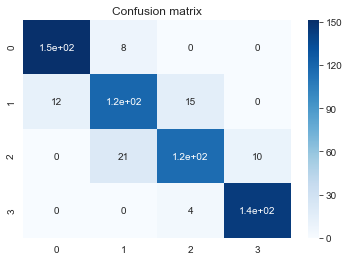

In [184]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap='Blues').set_title('Confusion matrix')
plt.show()

And here we go, with a classifier with higher accuracy compare to that with only 10 trees!